In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('dataset.csv')
df.dropna
df.head(3)
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [21]:
df['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [22]:
df.columns
missing_columns = ['track_name','Unnamed: 0', 'track_id', 'artists', 'album_name']
for column in missing_columns:
    if column not in df.columns:
        print(f"Column '{column}' not found in DataFrame.")
df1 = df.drop(columns=['duration_ms'], axis=1)
df1.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

Dropping some irrelevant columns

In [23]:
df1=df.drop(columns=['track_name','Unnamed: 0', 'track_id', 'album_name','artists'], axis=1)
df1.columns

Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

Filtering the dataframe to include only 20 relevant genres (out of 125 genres).

In [24]:
# List of relevant genres
relevant_genres = ['acoustic', 'afrobeat', 'alt-rock', 'ambient', 'blues', 'classical', 'country', 'disco', 'electronic', 'folk', 'funk', 'hip-hop', 'indie', 'jazz', 'latin', 'metal', 'pop', 'reggae', 'rock', 'soul']

df2 = df[df['track_genre'].isin(relevant_genres)]# Filtering the dataframe to include only the relevant genres
df2.head()


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


**Are there any noticeable differences in energy levels across different music genres?**

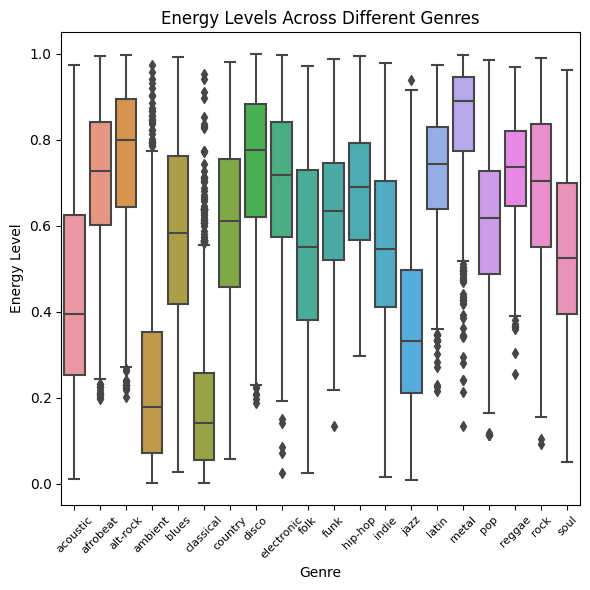

In [25]:
#boxplot to show the energy levels across different genres
plt.figure(figsize=(6,6))
sns.boxplot(x='track_genre', y='energy', data=df2)
plt.title('Energy Levels Across Different Genres')
plt.xlabel('Genre')
plt.ylabel('Energy Level')
plt.xticks(rotation=45, fontsize=8)
plt.tight_layout()
plt.show()

**How does the popularity of songs vary with respect to their tempo?**

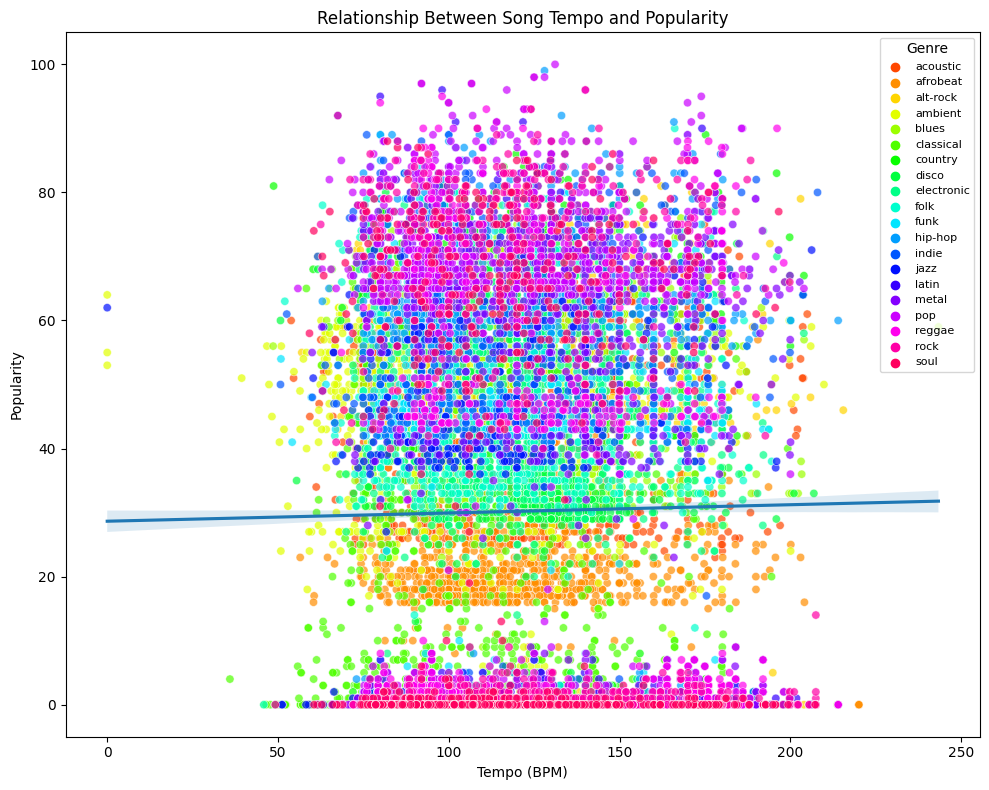

In [26]:
#scatterplot to show relationship between song tempo and popularity
df3 = df2[['tempo', 'popularity', 'track_genre']]

# Plot scatter plot
palette = sns.color_palette('hsv',20)  #To get different colors for each genre
plt.figure(figsize=(10, 8))
sns.scatterplot(x='tempo', y='popularity', hue='track_genre', data=df3, palette=palette, alpha=0.7)
sns.regplot(x='tempo', y='popularity',data=df3,scatter=False)
plt.title('Relationship Between Song Tempo and Popularity')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Popularity')
plt.legend(title='Genre',fontsize=8)
plt.tight_layout()
plt.show()

 **Which genres tend to have higher danceability scores on average?**

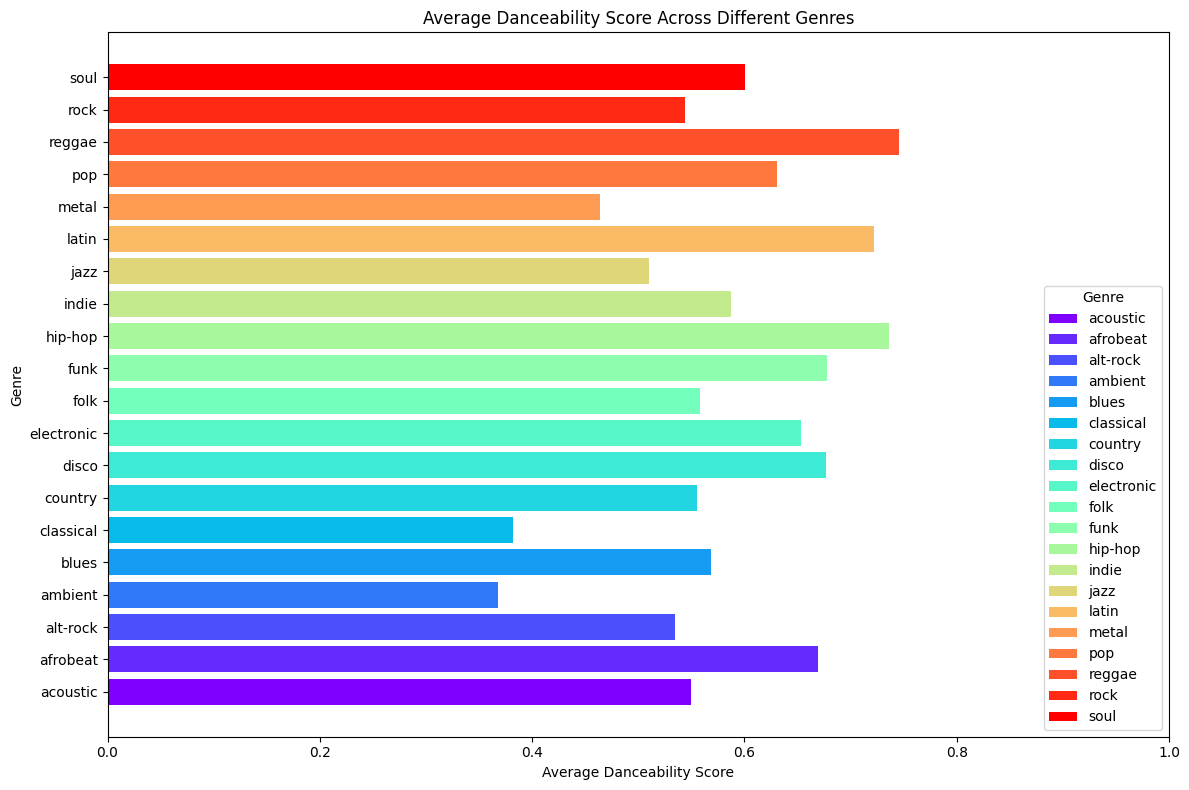

In [27]:
# Filter the dataframe to include relevant columns
df4 = df2[['track_genre','danceability']]

# Calculate the mean danceability score for each genre
genre_avg_danceability = df4.groupby('track_genre')['danceability'].mean().reset_index()

# Set up the color palette
colors = plt.cm.rainbow(np.linspace(0, 1, len(genre_avg_danceability)))

# Plot bar chart
plt.figure(figsize=(12, 8))
bars = plt.barh(genre_avg_danceability['track_genre'], genre_avg_danceability['danceability'], color=colors)
plt.title('Average Danceability Score Across Different Genres')
plt.xlabel('Average Danceability Score')
plt.ylabel('Genre')
plt.xlim(0, 1)  # Limit x-axis to the range of danceability score (0 to 1)
legend_labels = genre_avg_danceability['track_genre']
plt.legend(bars, legend_labels, title='Genre', loc='lower right')
plt.tight_layout()
plt.show()

**Do acoustic features vary significantly between instrumental and non-instrumental genres?**

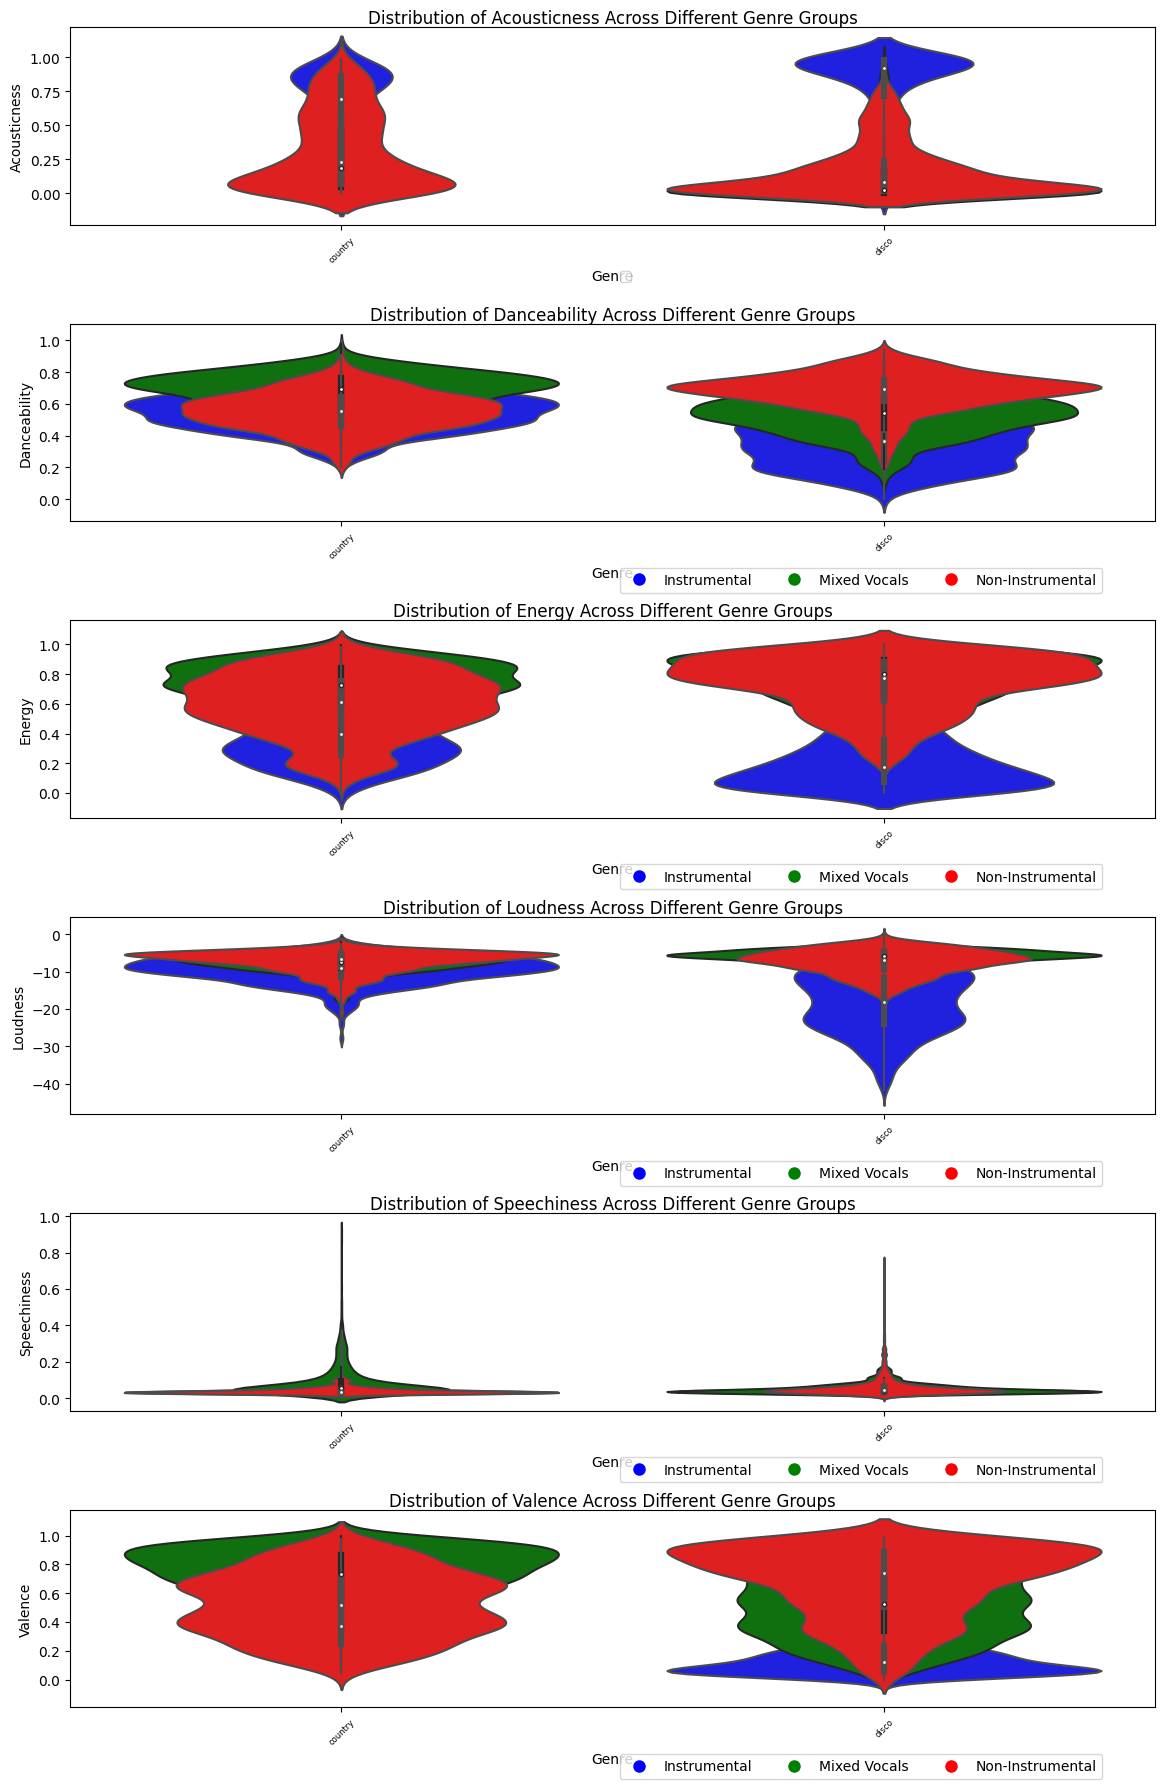

In [28]:
#violin plots to show variation of acoustic features between different classifications of genres
import seaborn as sns
# Instrumental Genres
instrumental = ["acoustic", "ambient", "classical"]

# Mixed Vocals Genres
mixed_vocals = [
    "afrobeat", "alt-rock", "alternative", "black-metal", "bluegrass", "blues",
    "breakbeat", "chill", "club", "dance", "dancehall", "death-metal", "drum-and-bass",
    "electronic", "folk", "forro"
]

# Non-Instrumental Genres
non_instrumental = [
    "anime", "disco", "children", "comedy", "country", "disney", "cantopop", "emo"
]
instrumental_songs = df2[df2['track_genre'].isin(instrumental)]
mixed_vocals_songs = df2[df2['track_genre'].isin(mixed_vocals)]
non_instrumental_songs = df2[df2['track_genre'].isin(non_instrumental)]
acoustic_features = ['acousticness', 'danceability', 'energy', 'loudness', 'speechiness', 'valence']
plt.figure(figsize=(12, 18))
legend_handles = []

for i, feature in enumerate(acoustic_features, start=1):

    ax = plt.subplot(len(acoustic_features), 1, i)
    sns.violinplot(x='track_genre', y=feature, data=instrumental_songs, color='blue', alpha=0.5)
    sns.violinplot(x='track_genre', y=feature, data=mixed_vocals_songs, color='green', alpha=0.5)
    sns.violinplot(x='track_genre', y=feature, data=non_instrumental_songs, color='red', alpha=0.5)
    plt.title(f'Distribution of {feature.capitalize()} Across Different Genre Groups',pad=-5)
    plt.xlabel('Genre')  # Clear xlabel
    plt.ylabel(feature.capitalize())
    plt.xticks(rotation=45,fontsize=6)
    plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(0.5, -0.2), ncol=3)
    if i == 1:
        legend_handles.extend([
            plt.Line2D([0], [0], color='blue', marker='o', linestyle='', markersize=8, label='Instrumental'),
            plt.Line2D([0], [0], color='green', marker='o', linestyle='', markersize=8, label='Mixed Vocals'),
            plt.Line2D([0], [0], color='red', marker='o', linestyle='', markersize=8, label='Non-Instrumental')
        ])
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()

**Can we identify clusters of similar songs based on their audio features, and do these clusters align with known music genres?**

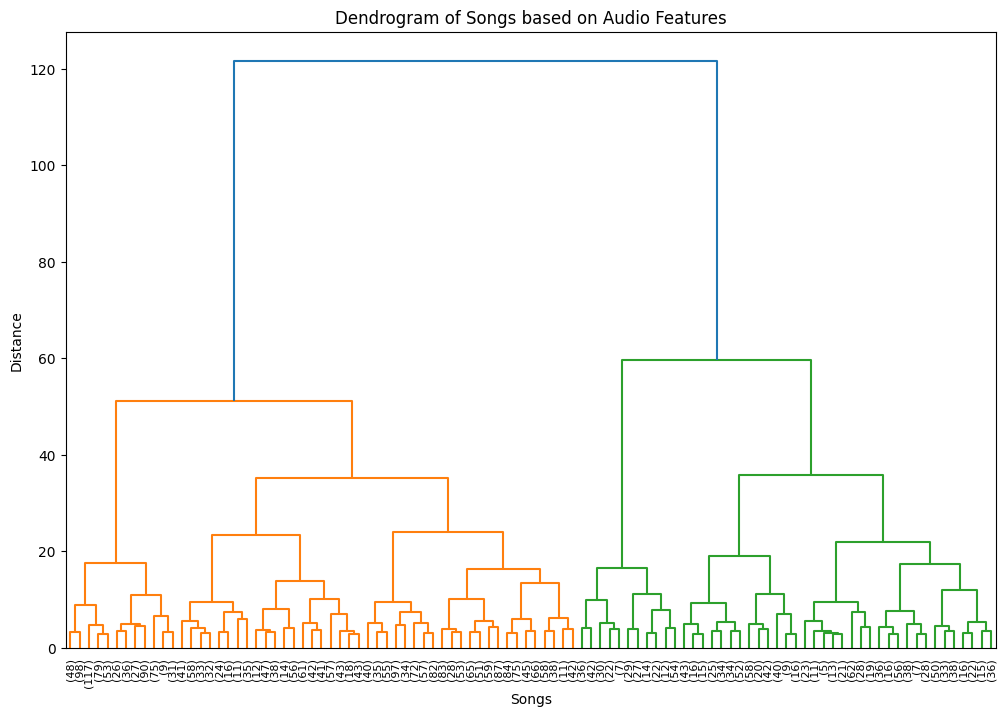

In [29]:
#dendrogram to identify clusters of similar songs 
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

audio_features = ['danceability', 'energy', 'loudness', 'acousticness']

sampled_data = df2.sample(frac=0.2)

normalized_features = (sampled_data[audio_features] - sampled_data[audio_features].mean()) / sampled_data[audio_features].std()

# Apply PCA for further dimensionality reduction
pca = PCA(n_components=3)  # Reduce to 3 dimensions
reduced_features = pca.fit_transform(normalized_features)

Z = linkage(reduced_features, method='ward')

plt.figure(figsize=(12, 8))
dendrogram(Z, labels=sampled_data['track_genre'].values, leaf_rotation=90, leaf_font_size=8, truncate_mode='lastp', p=100)
plt.title('Dendrogram of Songs based on Audio Features')
plt.xlabel('Songs')
plt.ylabel('Distance')
plt.xticks(rotation=90)
plt.show()

**Are there any correlations between instrumentalness and other audio features such as valence or energy?**

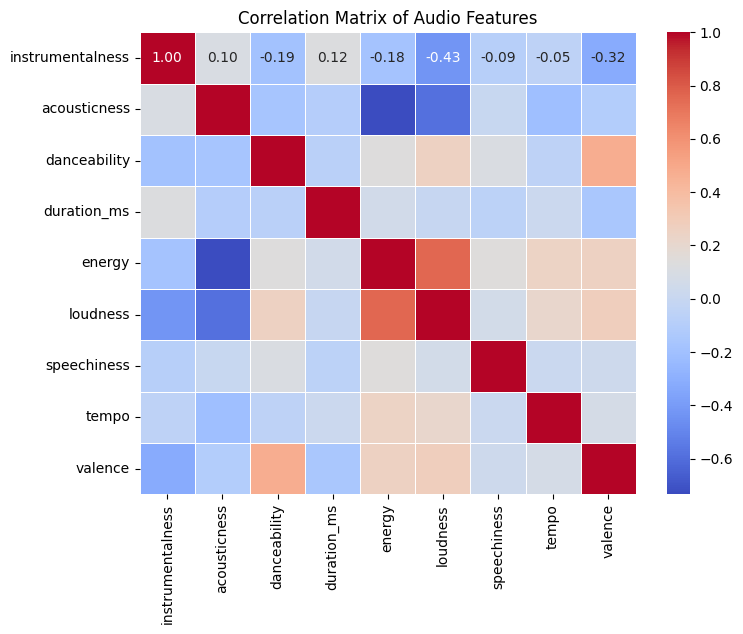

In [36]:
#heat map to show correlation between different audio features
# Select relevant columns for correlation analysis
selected_columns = ['instrumentalness', 'acousticness', 'danceability', 'duration_ms', 'energy',
                    'loudness', 'speechiness', 'tempo', 'valence']
df_selected = df [selected_columns]

# Calculate  Pearson correlation matrix
correlation_matrix = df_selected.corr(method='pearson') #using karl pearsons coefficient of correlation

# Create heatmap to visualize correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Audio Features')
plt.show()


**Impact of Explicit Content on Popularity**

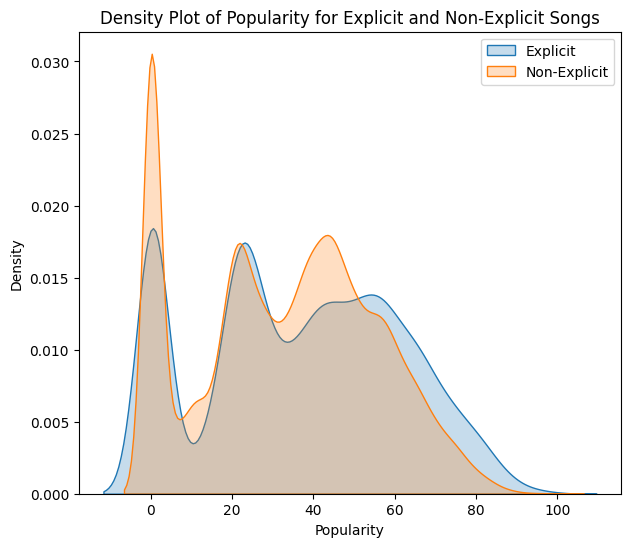

In [31]:
#desnity plot to show impact of explicit content on popularity
explicit_popularity = df[df['explicit'] == True]['popularity']
non_explicit_popularity = df[df['explicit'] == False]['popularity']

#density plots
plt.figure(figsize=(7, 6))
sns.kdeplot(explicit_popularity, label='Explicit', fill=True)
sns.kdeplot(non_explicit_popularity, label='Non-Explicit', fill=True)


plt.xlabel('Popularity')
plt.ylabel('Density')
plt.title('Density Plot of Popularity for Explicit and Non-Explicit Songs')
plt.legend()
plt.show()


**Genre-specific Trends in Popularity**

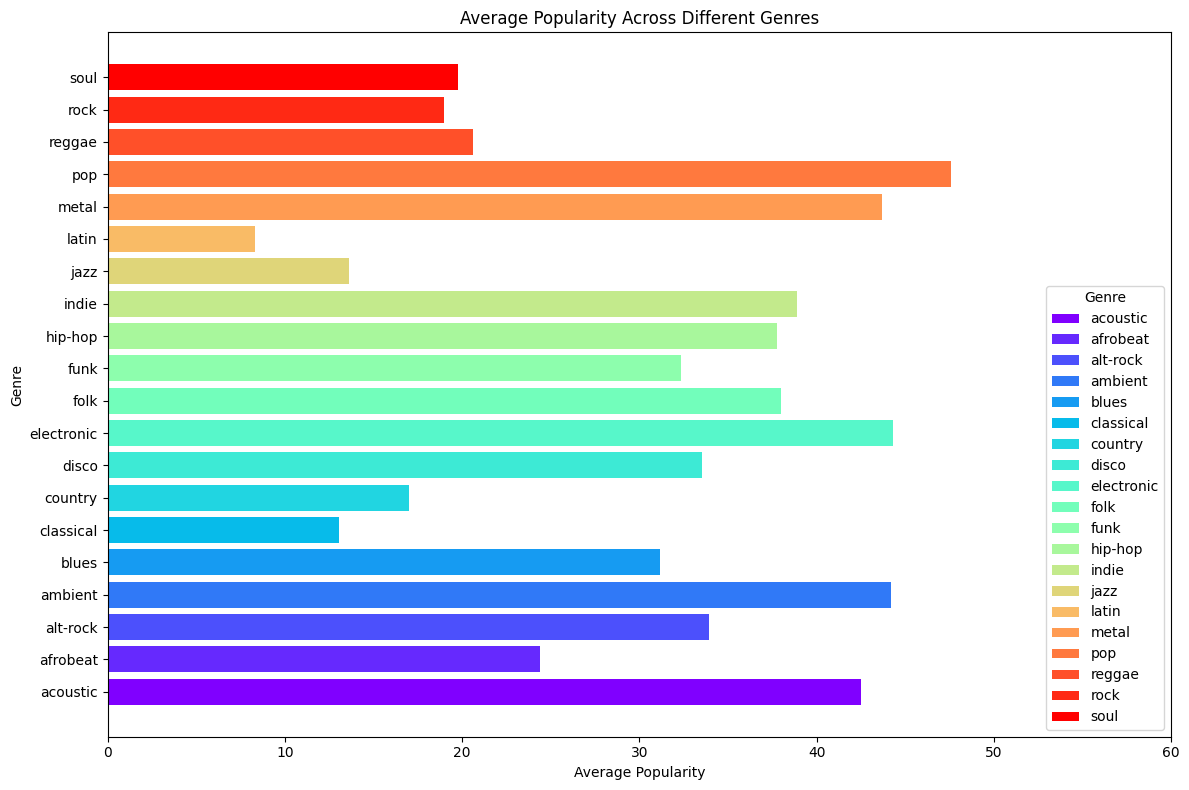

In [32]:
# relevant columns
df4 = df2[['track_genre', 'popularity']]

#mean popularity for each genre
genre_avg_popularity = df4.groupby('track_genre')['popularity'].mean().reset_index()

#color palette
colors = plt.cm.rainbow(np.linspace(0, 1, len(genre_avg_popularity)))

plt.figure(figsize=(12, 8))
bars = plt.barh(genre_avg_popularity['track_genre'], genre_avg_popularity['popularity'], color=colors)
plt.title('Average Popularity Across Different Genres')
plt.xlabel('Average Popularity')
plt.ylabel('Genre')
plt.xlim(0, 60)  # Limit x-axis to the range of popularity (0 to 100)
plt.legend(bars, genre_avg_popularity['track_genre'], title='Genre', loc='lower right')
plt.tight_layout()
plt.show()


**How does the distribution of song duration vary across different genres?**

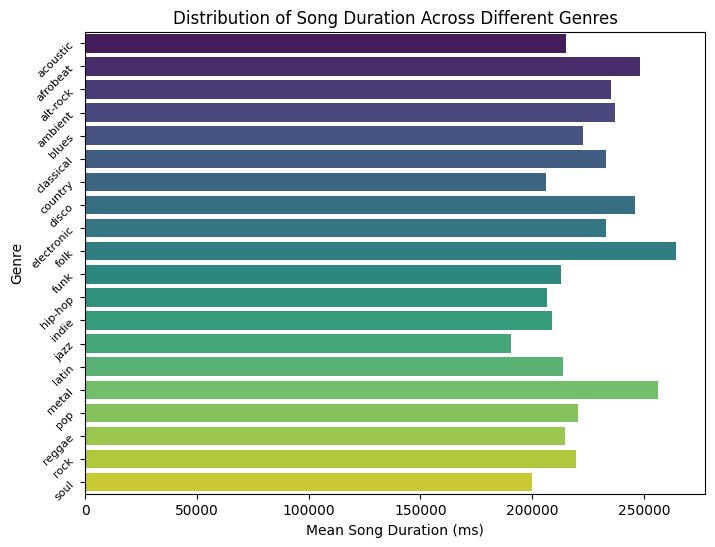

In [33]:
#bar plot to show distribution of song duration across each genre
#mean duration for each genre
genre_durations = df2.groupby('track_genre')['duration_ms'].mean().reset_index()

#bar chart to visualize the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x='duration_ms', y='track_genre', data=genre_durations, palette='viridis')
plt.xlabel('Mean Song Duration (ms)')
plt.ylabel('Genre')
plt.title('Distribution of Song Duration Across Different Genres')
plt.yticks(rotation=45,fontsize=8)
plt.show()


**How does the distribution of explicit vs. non-explicit songs vary across genres? (Pie chart)**

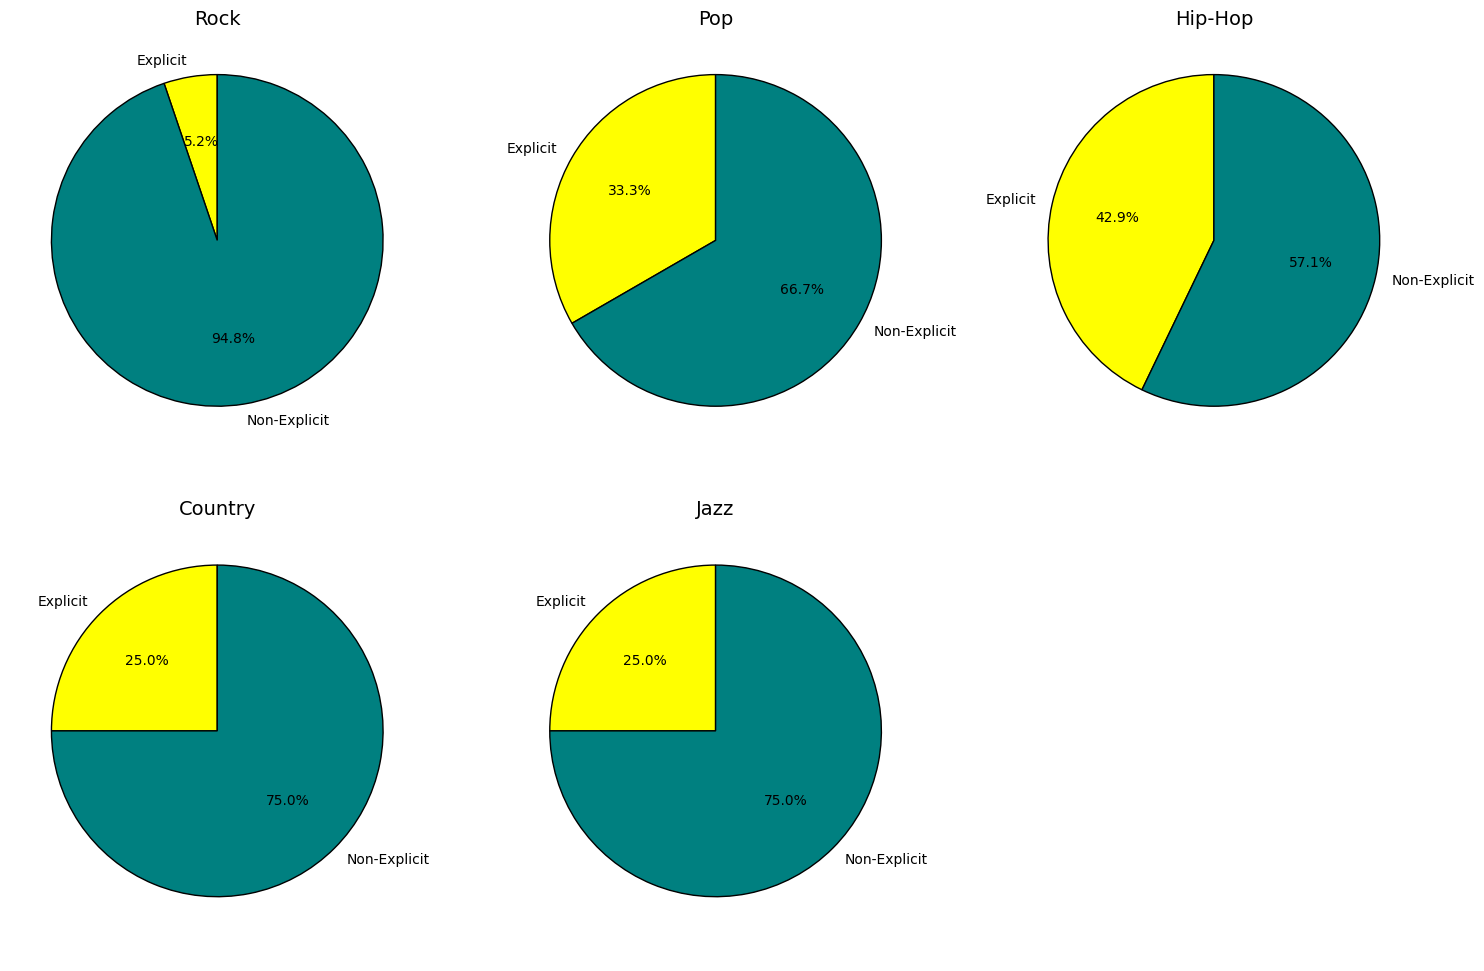

In [34]:
#pie chart to show distribution of explicit vs. non-explicit songs vary across genres
import matplotlib.pyplot as plt
labels = ['Explicit', 'Non-Explicit']
values = [[52, 948], [100, 200], [300, 400], [50, 150], [25, 75]]
genres = ['Rock', 'Pop', 'Hip-Hop', 'Country', 'Jazz']

# subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# pie chart
for i, ax in enumerate(axs.flat[:5]):
    ax.pie(values[i], labels=labels, autopct="%1.1f%%", startangle=90, colors=['yellow', 'teal'], wedgeprops={'edgecolor': 'black'})
    ax.set_title(genres[i], fontsize=14)

# Remove the unused subplot
axs.flat[-1].axis('off')
plt.tight_layout()
plt.show()
